In [1]:
library(dplyr)
library(tidyr)
library(stringr)
library(kernlab)
library(igraph)
library(Rcpp)
library(inline)
library(mixKernel)

#For gene distance matrices based on betti curves
setwd("/gpfs/projects/UITS/IUNI/IMAGENE/Phom_output/")
block0 = read.csv("Betticurves_differences_genes_PH0.csv", header=FALSE, sep=',');
block1 <- block0[-c(1),]
block1 <- block1[,-c(1)]
#simple RBF kernel
blockK <- exp(data.matrix(block1)*(-0.01))

#Kthick1 <- compute.kernel(data.matrix(blockK), kernel.func = "kidentity");
#pdf('/gpfs/projects/UITS/IUNI/IMAGENE/Phom_output/clusteringResults/kernelSimilarity_betti.pdf')
#cim.kernel(Thick1=Kthick1, Thick2=)
#dev.off()

#meta.kernel0 <- combine.kernels(Thick1=Kthick1, Thick2=Kthick2, method = "STATIS-UMKL")



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘inline’

The following object is masked from ‘package:Rcpp’:

    registerPlugin

Loading required package: mixOmics
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:kernlab’:

    alpha


Loaded mixOmics 6.3.2

Thank you for us

19.390509,13.133626,-6.350637,-5.389824,-3.291075,-0.9269165
-2.139496,-17.663384,-8.262295,-3.218272,2.591201,-0.8901197
-27.082448,10.028892,-3.909159,7.700685,-2.970561,2.0353656
4.772863,-1.588941,16.022767,2.163700,2.462539,0.1852287


[1] 830 923 693 974

[1] 1316764.6 1017680.0 1417029.4  890446.2

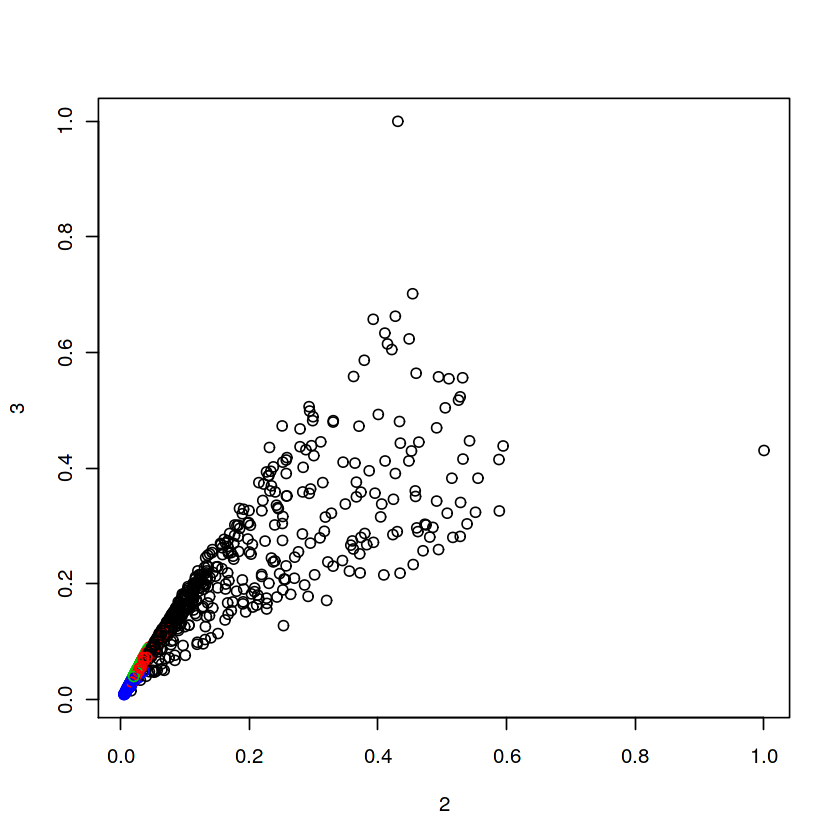

In [7]:
sc <- specc(rotated(pca_K), centers = 4); #change the centers parameter for different numbers of cluster
centers(sc)
size(sc)
withinss(sc)
plot(K, col=sc)

### blockK is the guassian RBF kernel built from the betti curve differences. We conduct spctral clustering and pca for gene clustering. These are further visulaized using http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/everyxs/ca1e67d12478b502fdfec88ad6d788bd/raw/cac2c82c941393136919a5e3b731b0c00a4f43b5/GeneBettiClusters.json

In [10]:
write.table(pcv(pca_K), file='/gpfs/projects/UITS/IUNI/IMAGENE/workingdir/yan30/genePH0KPCA20.tsv', quote=FALSE, sep='\t', col.names = F, row.names = F)

0.031075806,0.07425560,0.0024971114,-0.16383484,0.005486448,0.293063252,-0.0010946953,0.056914450,-0.389687597,0.112155219,0.219838381,0.291520245,0.055859402,0.002284381,0.030712381,-0.255762199,-0.050875298,0.01961642,0.093293821,0.2332036760
0.031981826,0.07939392,-0.0166006493,-0.16737008,0.002017517,0.263251362,0.0366059084,0.020214987,-0.301966935,0.157883197,0.134629289,0.133723866,-0.072880223,-0.177509913,0.054279430,-0.138421848,-0.193748448,-0.26638764,0.362742872,-0.0159056921
-0.073625118,0.03398302,-0.0870891647,0.04517238,-0.106090191,0.133384226,0.0197315941,0.237705293,0.172334021,-0.144301692,-0.117481247,-0.004629161,0.121669043,-0.007805257,-0.103923584,-0.165921363,-0.532703607,0.09865457,0.158227659,0.2159741809
-0.023037792,-0.13098036,0.0011666838,-0.11109658,-0.049396948,-0.035872924,-0.0251529125,-0.133591660,0.047281616,0.034641173,-0.189962865,0.311727582,-0.106389619,-0.081335755,0.082621195,0.039467509,-0.100223620,0.57176829,0.203098027,-0.0132726412
0.052969309,0.01894885,-0.1075160021,0.07141888,0.106996585,-0.109713451,0.2361365416,0.179454986,-0.049991928,0.175012385,-0.064977863,0.119114944,0.154052756,0.287406383,-0.072593638,0.265861243,-0.020260745,0.49567697,-0.129713203,-0.1317243048
-0.023591930,-0.12947247,-0.0551499214,-0.13377329,-0.001666229,-0.040079203,-0.1284498213,-0.057405665,0.097251703,0.104378249,-0.017509704,0.157993608,0.027068568,-0.197972697,0.011429388,0.110304200,0.032822082,0.41667681,-0.002771344,-0.0005661286
-0.046300047,0.04137069,0.1007092059,-0.02297896,0.081582048,-0.174858446,0.0002295352,-0.059875702,-0.231546708,-0.042259077,0.177015836,-0.175640498,0.226515386,-0.179316186,-0.399435034,0.059955314,-0.199066207,0.21895762,-0.212090683,-0.2810392426
0.071533057,0.04061144,-0.0510305723,0.06397721,-0.073534173,-0.186250061,-0.1269309222,-0.035354864,-0.017524884,-0.172345919,0.077730016,0.310569319,0.357313128,0.052284182,-0.135901840,-0.149153716,0.092717313,-0.42686067,0.239764370,0.2263442669
-0.091247368,0.05446243,-0.0394131470,0.10701740,-0.032221243,0.039982168,0.0238709319,-0.080103784,0.005057983,-0.008368247,-0.004745277,0.005711555,-0.134452367,-0.058651377,0.085944154,0.006914324,0.280695331,0.01177187,-0.082567178,0.0429050255
-0.004257507,0.02516690,0.1260690638,-0.04732827,0.210391741,-0.077670428,-0.1072316543,0.168876355,0.073320791,-0.176349176,-0.278254394,0.038768036,-0.139316335,-0.081291359,0.185995029,-0.058525428,-0.208546281,-0.12952968,-0.105177380,0.2043612331
-0.065415268,-0.03221862,0.0141942717,-0.08365735,-0.173633998,-0.148320656,0.1088261531,0.137103771,-0.194547943,-0.061131493,-0.005054459,-0.055823928,-0.054285305,0.288821652,0.094494074,0.086435069,0.104869864,-0.22009633,0.249027885,-0.2059841192


2,10.774156,15.705085,0.3961521,-18.234239,0.5410070,20.8680495,-0.06987564,3.1224917,-17.5181729,4.5649245,8.1872654,9.4868295,1.5131412,0.05982124,0.75436057,-5.8790415,-1.14312481,0.3580066,1.62130665,3.989019495
3,11.088278,16.791840,-2.6335960,-18.627699,0.1989430,18.7452450,2.33659678,1.1090528,-13.5747430,6.4261377,5.0138912,4.3517235,-1.9742078,-4.64846420,1.33321680,-3.1818142,-4.35336332,-4.8616694,6.30392696,-0.272071679
4,-25.526240,7.187421,-13.8161870,5.027527,-10.4613280,9.4978426,1.25949010,13.0412012,7.7471729,-5.8733454,-4.3752603,-0.1506450,3.2958184,-0.20439680,-2.55258147,-3.8139279,-11.96939830,1.8004811,2.74975936,3.694303764
5,-7.987331,-27.702390,0.1850876,-12.364658,-4.8709279,-2.5543904,-1.60553902,-7.3292256,2.1255168,1.4099597,-7.0746354,10.1444290,-2.8819234,-2.12994496,2.02935007,0.9072143,-2.25193974,10.4349752,3.52953904,-0.227032547
6,18.364756,4.007688,-17.0567853,7.948669,10.5507055,-7.8123262,15.07286406,9.8454205,-2.2473572,7.1233273,-2.4199187,3.8763111,4.1730410,7.52633058,-1.78305219,6.1111817,-0.45524176,9.0462814,-2.25422089,-2.253184121
7,-8.179454,-27.383471,-8.7492127,-14.888494,-0.1643033,-2.8539054,-8.19909821,-3.1494411,4.3718922,4.2483875,-0.6520999,5.1415243,0.7332439,-5.18432453,0.28072978,2.5354919,0.73748435,7.6045003,-0.04816179,-0.009683802
8,-16.052485,8.749914,15.9769269,-2.557477,8.0446321,-12.4510824,0.01465150,-3.2849545,-10.4090438,-1.7200225,6.5924595,-5.7158001,6.1359369,-4.69576520,-9.81096327,1.3781543,-4.47284886,3.9960546,-3.68581791,-4.807261347
9,24.800911,8.589333,-8.0957020,7.120437,-7.2510483,-13.2622410,-8.10214515,-1.9396703,-0.7878207,-7.0147972,2.8948370,10.1067360,9.6790370,1.36916943,-3.33803460,-3.4285007,2.08327941,-7.7903594,4.16674508,3.871687227
10,-31.635973,11.518823,-6.2526654,11.910658,-3.1772682,2.8469958,1.52370874,-4.3947257,0.2273786,-0.3406031,-0.1767246,0.1858689,-3.6420980,-1.53590761,2.11096892,0.1589351,6.30698604,0.2148409,-1.43489370,0.733903453
11,-1.476101,5.322807,20.0001201,-5.267469,20.7462818,-5.5306502,-6.84471847,9.2650462,3.2960923,-7.1777371,-10.3628063,1.2616131,-3.7738551,-2.12878237,4.56842852,-1.3452865,-4.68585807,-2.3639628,-1.82782509,3.495660776
12,-22.679839,-6.814249,2.2518382,-9.310767,-17.1216790,-10.5614156,6.94649714,7.5219102,-8.7457864,-2.4881647,-0.1882392,-1.8166563,-1.4705015,7.56339231,2.32097290,1.9868275,2.35633692,-4.0168364,4.32773108,-3.523420735


-0.004932171,-0.01057239,-0.001099533,0.01722368,-0.005089397,-0.01474498,0.001213708,-0.006081348,0.009016254,0.001712242,0.01064757,-0.003185545,0.008614987,-0.0002959831,-0.007341057,-0.00589747,-0.01612738,0.009685565,0.000766873,-0.002141623
0.018107585,0.05485273,0.051555667,-0.08823195,0.081699326,0.11290287,-0.091678554,0.166436445,-0.097295450,-0.058887164,-0.06687916,0.198537092,-0.078835034,0.1252520114,0.033539406,-0.06326315,0.27012092,-0.056988331,-0.146492500,0.041657068
0.049208704,0.08698803,-0.043824412,-0.14301642,-0.021885310,0.07934452,0.088468034,-0.105500381,-0.015933351,0.043571524,-0.07418861,-0.183666839,-0.031518029,-0.1402232776,0.065645660,0.15675553,-0.08230062,-0.071923158,0.158024305,-0.017601594


[1] 2970  241  209

[1] 1554.3468  251.1953  209.0017

ERROR: Error in eval(expr, envir, enclos): object 'kernel.pca.result' not found


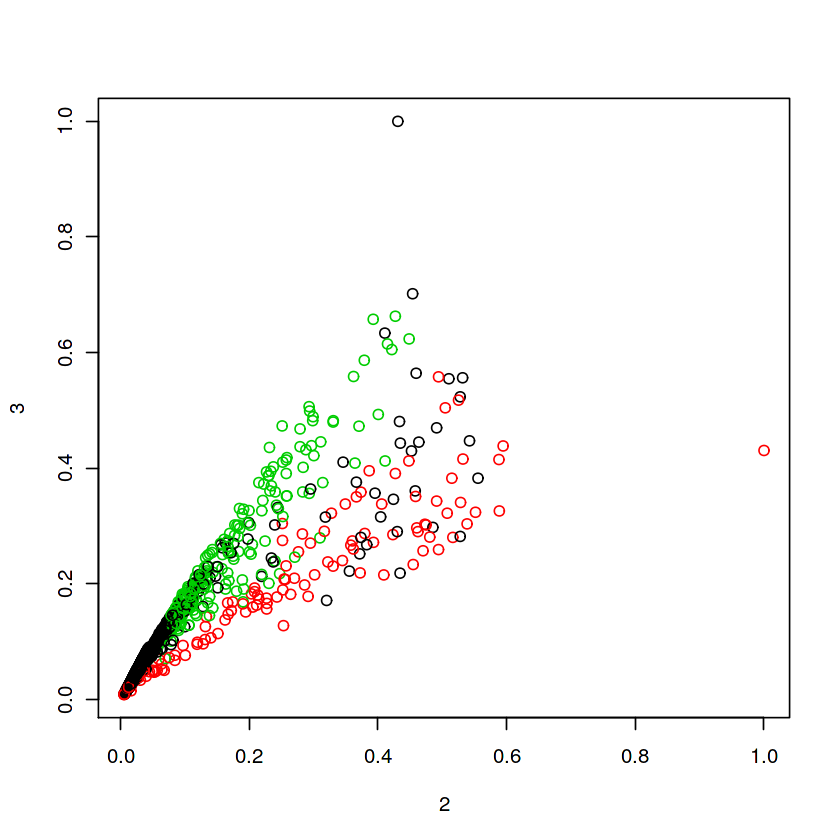

In [9]:
#kernel for kernel lab
Kthick1 <- compute.kernel(data.matrix(blockK), kernel.func = "kidentity");
K <- as.kernelMatrix(as.matrix(Kthick1$kernel));

pca_K <- kpca(K, features = 20, th = 1e-4) # change the features parameters for leading components
pcv(pca_K)
rotated(pca_K)

sc <- specc(pcv(pca_K), centers = 3); #change the centers parameter for different numbers of cluster
#sc
centers(sc)
size(sc)
withinss(sc)
plot(K, col=sc)


output = kernel.pca.result$x
output <- cbind(output, feature)

write.table(pcv(pca_K), file='/gpfs/projects/UITS/IUNI/IMAGENE/workingdir/yan30/genePH0KPCA.tsv', quote=FALSE, sep='\t', col.names = F, row.names = F)
write.table(sc@.Data, file='/gpfs/projects/UITS/IUNI/IMAGENE/workingdir/yan30/genePH0label.tsv', quote=FALSE, sep='\t', col.names = F, row.names = F)

### Optional 1: t-sne plots

In [ ]:
##t-sne plots
library(tsne)
ecb = function(x,y){ plot(x,t='n'); text(x,col=sc)}
pdf('/gpfs/projects/UITS/IUNI/IMAGENE/Phom_output/clusteringResults/test.pdf')
tsne_K = tsne(K, epoch_callback = ecb, perplexity=5)
dev.off()


### Optional 2: incorperating multiple similariy matrices

In [ ]:
pdf('/gpfs/projects/UITS/IUNI/IMAGENE/Phom_output/clusteringResults/kernelSimilarity_betti.pdf')
cim.kernel(Thick1=Kthick1, Thick2=Kthick2)
dev.off()

meta.kernel0 <- combine.kernels(Thick1=Kthick1, Thick2=Kthick2, method = "STATIS-UMKL")